# Klasifikasi Random Forest

## 1. Import Libraries dan Setup

In [1]:
# Import semua library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style dan random state untuk reproducibility
plt.style.use('default')
sns.set_palette("husl")
RANDOM_STATE = 42

## 2. Load dan Eksplorasi Dataset

Dataset Shape: (1000, 20)

Target Distribution:
0    797
1    203
dtype: int64


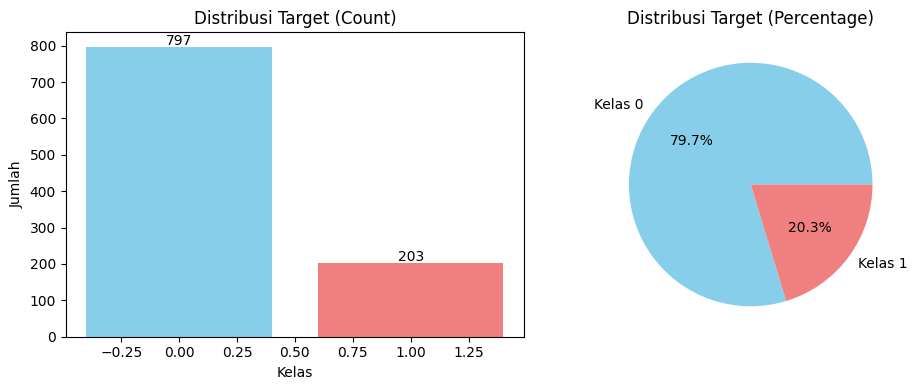

In [2]:
# Membuat dataset sintetis yang tidak seimbang
X, y = make_classification(
    n_samples=1000,          # 1000 sampel data
    n_features=20,           # 20 fitur
    n_informative=15,        # 15 fitur yang informatif
    n_redundant=5,           # 5 fitur redundan
    n_clusters_per_class=1,  # 1 cluster per kelas
    weights=[0.8, 0.2],      # 80% kelas 0, 20% kelas 1 (tidak seimbang)
    random_state=RANDOM_STATE
)

print("Dataset Shape:", X.shape)
print("\nTarget Distribution:")
print(pd.Series(y).value_counts().sort_index())

# Visualisasi distribusi target
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts = pd.Series(y).value_counts().sort_index()
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Distribusi Target (Count)')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 5, str(v), ha='center')

plt.subplot(1, 2, 2)
target_pct = pd.Series(y).value_counts(normalize=True).sort_index() * 100
plt.pie(target_pct.values, labels=[f'Kelas {i}' for i in target_pct.index], 
        autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribusi Target (Percentage)')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [3]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Standardisasi fitur untuk performa yang lebih baik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Split:")
print(f"Training: {X_train.shape[0]} samples")
print(f"Testing: {X_test.shape[0]} samples")
print(f"\nTraining Distribution: {Counter(y_train)}")
print(f"Testing Distribution: {Counter(y_test)}")

Data Split:
Training: 800 samples
Testing: 200 samples

Training Distribution: Counter({0: 638, 1: 162})
Testing Distribution: Counter({0: 159, 1: 41})


## 4. Model 1: Random Forest - Data Original

=== RANDOM FOREST - DATA ORIGINAL ===
Accuracy: 0.9650
Precision: 1.0000
Recall: 0.8293
F1-Score: 0.9067
AUC-ROC: 0.9940


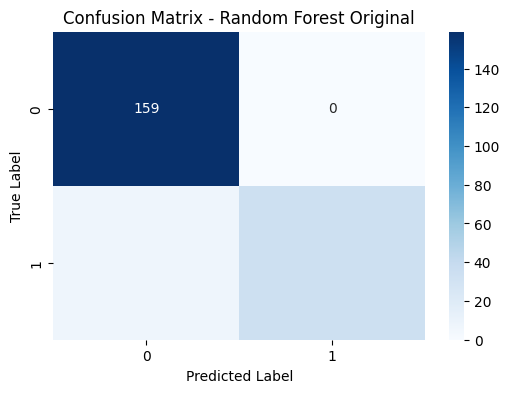

In [4]:
# Training Random Forest dengan data original (tidak seimbang)
rf_original = RandomForestClassifier(
    n_estimators=100,        # 100 decision trees
    random_state=RANDOM_STATE,
    max_depth=10            # Batasi kedalaman untuk menghindari overfitting
)

rf_original.fit(X_train_scaled, y_train)
y_pred_original = rf_original.predict(X_test_scaled)
y_pred_proba_original = rf_original.predict_proba(X_test_scaled)[:, 1]

# Evaluasi performa
accuracy_original = accuracy_score(y_test, y_pred_original)
precision_original = precision_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)
auc_original = roc_auc_score(y_test, y_pred_proba_original)

print("=== RANDOM FOREST - DATA ORIGINAL ===")
print(f"Accuracy: {accuracy_original:.4f}")
print(f"Precision: {precision_original:.4f}")
print(f"Recall: {recall_original:.4f}")
print(f"F1-Score: {f1_original:.4f}")
print(f"AUC-ROC: {auc_original:.4f}")

# Confusion Matrix
cm_original = confusion_matrix(y_test, y_pred_original)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Original')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## 5. Model 2: Random Forest + SMOTE

In [6]:
# Aplikasi SMOTE untuk balancing data
smote = SMOTE(random_state=RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Distribusi setelah SMOTE:")
print(f"Before: {Counter(y_train)}")
print(f"After: {Counter(y_train_smote)}")

# Training Random Forest dengan data yang telah di-balance
rf_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    max_depth=10
)

rf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_smote.predict(X_test_scaled)
y_pred_proba_smote = rf_smote.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
f1_smote = f1_score(y_test, y_pred_smote)
auc_smote = roc_auc_score(y_test, y_pred_proba_smote)

print("\n=== RANDOM FOREST - DATA DENGAN SMOTE ===")
print(f"Accuracy: {accuracy_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")
print(f"F1-Score: {f1_smote:.4f}")
print(f"AUC-ROC: {auc_smote:.4f}")

Distribusi setelah SMOTE:
Before: Counter({0: 638, 1: 162})
After: Counter({0: 638, 1: 638})

=== RANDOM FOREST - DATA DENGAN SMOTE ===
Accuracy: 0.9850
Precision: 0.9750
Recall: 0.9512
F1-Score: 0.9630
AUC-ROC: 0.9945


=== VISUALISASI DISTRIBUSI KELAS - SMOTE ===


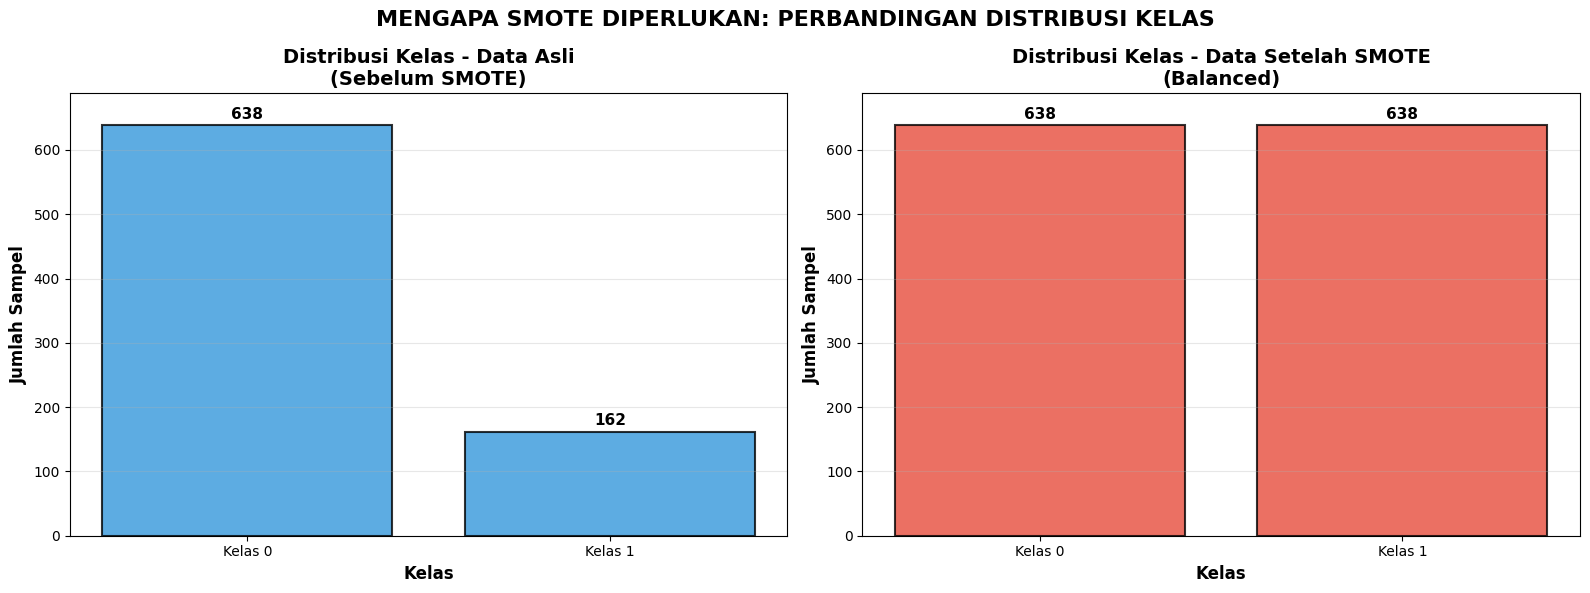

Grafik distribusi kelas SMOTE selesai!

STATISTIK DISTRIBUSI KELAS - SMOTE:
Kelas       Sebelum    Sesudah   Penambahan
---------------------------------------------
Kelas 0         638        638            0
Kelas 1         162        638          476

RINGKASAN SMOTE:
• Total kelas: 2
• Sampel minimum sebelum: 162
• Sampel maksimum sebelum: 638
• Semua kelas setelah SMOTE: 638 (balanced)

PENJELASAN MENGAPA SMOTE BERHASIL:
• Kelas minoritas (Kelas 1) dari 162 sampel menjadi 638 sampel
• Semua kelas memiliki representasi yang sama dalam training
• Model dapat belajar pola dari semua kelas dengan baik
• Akurasi meningkat karena tidak ada bias terhadap kelas mayoritas


In [25]:
# GRAFIK DISTRIBUSI KELAS: SEBELUM vs SESUDAH SMOTE
print("=== VISUALISASI DISTRIBUSI KELAS - SMOTE ===")

# Buat grafik batang untuk membandingkan distribusi kelas SMOTE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Data untuk plotting SMOTE
class_names = ['Kelas 0', 'Kelas 1']
original_counts = [Counter(y_train)[0], Counter(y_train)[1]]
smote_counts = [Counter(y_train_smote)[0], Counter(y_train_smote)[1]]

# Grafik 1: Data Asli (Sebelum SMOTE)
bars1 = ax1.bar(class_names, original_counts, color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_title('Distribusi Kelas - Data Asli\n(Sebelum SMOTE)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Kelas', fontsize=12, fontweight='bold')
ax1.set_ylabel('Jumlah Sampel', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas setiap bar
for bar, count in zip(bars1, original_counts):
    ax1.text(bar.get_x() + bar.get_width()/2., count + 5, 
             str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Grafik 2: Data Setelah SMOTE
bars2 = ax2.bar(class_names, smote_counts, color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_title('Distribusi Kelas - Data Setelah SMOTE\n(Balanced)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Kelas', fontsize=12, fontweight='bold')
ax2.set_ylabel('Jumlah Sampel', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas setiap bar
for bar, count in zip(bars2, smote_counts):
    ax2.text(bar.get_x() + bar.get_width()/2., count + 5, 
             str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Set y-axis limit yang sama untuk perbandingan yang fair
max_count = max(max(original_counts), max(smote_counts))
ax1.set_ylim(0, max_count + 50)
ax2.set_ylim(0, max_count + 50)

plt.suptitle('MENGAPA SMOTE DIPERLUKAN: PERBANDINGAN DISTRIBUSI KELAS', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("Grafik distribusi kelas SMOTE selesai!")

# Tampilkan ringkasan statistik SMOTE
print(f"\nSTATISTIK DISTRIBUSI KELAS - SMOTE:")
print(f"{'Kelas':8} {'Sebelum':>10} {'Sesudah':>10} {'Penambahan':>12}")
print("-" * 45)
for i, cls in enumerate(class_names):
    before = original_counts[i]
    after = smote_counts[i]
    added = after - before
    print(f"{cls:8} {before:10d} {after:10d} {added:12d}")

print(f"\nRINGKASAN SMOTE:")
print(f"• Total kelas: {len(class_names)}")
print(f"• Sampel minimum sebelum: {min(original_counts)}")
print(f"• Sampel maksimum sebelum: {max(original_counts)}")
print(f"• Semua kelas setelah SMOTE: {smote_counts[0]} (balanced)")

print(f"\nPENJELASAN MENGAPA SMOTE BERHASIL:")
print(f"• Kelas minoritas (Kelas 1) dari {original_counts[1]} sampel menjadi {smote_counts[1]} sampel")
print("• Semua kelas memiliki representasi yang sama dalam training")
print("• Model dapat belajar pola dari semua kelas dengan baik")
print("• Akurasi meningkat karena tidak ada bias terhadap kelas mayoritas")

## 6. Model 3: Random Forest + ADASYN

In [22]:
# Aplikasi ADASYN untuk balancing data
adasyn = ADASYN(random_state=RANDOM_STATE)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_scaled, y_train)

print("Distribusi setelah ADASYN:")
print(f"Before: {Counter(y_train)}")
print(f"After: {Counter(y_train_adasyn)}")

# Training Random Forest dengan ADASYN
rf_adasyn = RandomForestClassifier(
    n_estimators=100,
    random_state=RANDOM_STATE,
    max_depth=10
)

rf_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_adasyn = rf_adasyn.predict(X_test_scaled)
y_pred_proba_adasyn = rf_adasyn.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
precision_adasyn = precision_score(y_test, y_pred_adasyn)
recall_adasyn = recall_score(y_test, y_pred_adasyn)
f1_adasyn = f1_score(y_test, y_pred_adasyn)
auc_adasyn = roc_auc_score(y_test, y_pred_proba_adasyn)

print("\n=== RANDOM FOREST - DATA DENGAN ADASYN ===")
print(f"Accuracy: {accuracy_adasyn:.4f}")
print(f"Precision: {precision_adasyn:.4f}")
print(f"Recall: {recall_adasyn:.4f}")
print(f"F1-Score: {f1_adasyn:.4f}")
print(f"AUC-ROC: {auc_adasyn:.4f}")

Distribusi setelah ADASYN:
Before: Counter({0: 638, 1: 162})
After: Counter({1: 641, 0: 638})

=== RANDOM FOREST - DATA DENGAN ADASYN ===
Accuracy: 0.9450
Precision: 0.8750
Recall: 0.8537
F1-Score: 0.8642
AUC-ROC: 0.9925



=== VISUALISASI DISTRIBUSI KELAS - ADASYN ===


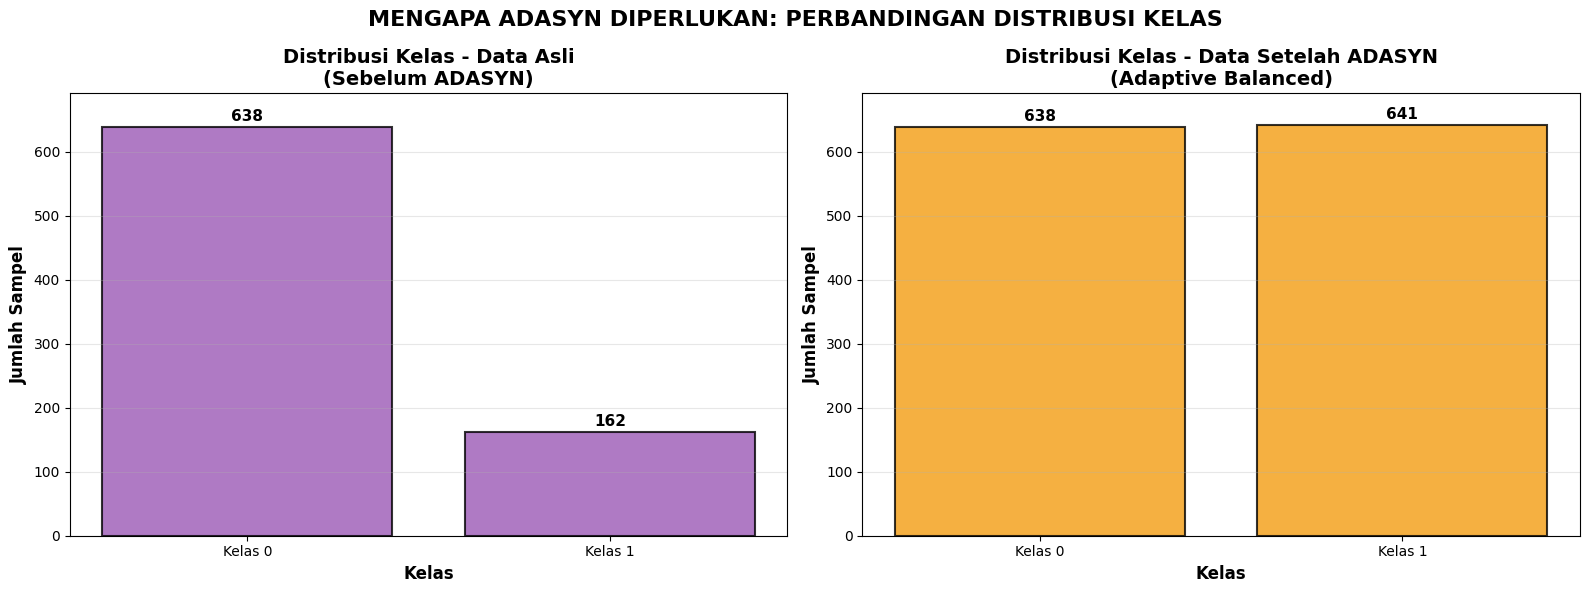

Grafik distribusi kelas ADASYN selesai!

STATISTIK DISTRIBUSI KELAS - ADASYN:
Kelas       Sebelum    Sesudah   Penambahan
---------------------------------------------
Kelas 0         638        638            0
Kelas 1         162        641          479

RINGKASAN ADASYN:
• Total kelas: 2
• Sampel minimum sebelum: 162
• Sampel maksimum sebelum: 638
• Kelas 0 setelah ADASYN: 638
• Kelas 1 setelah ADASYN: 641

PENJELASAN MENGAPA ADASYN BERHASIL:
• Kelas minoritas (Kelas 1) dari 162 sampel menjadi 641 sampel
• ADASYN lebih adaptif - menghasilkan lebih banyak sampel di area yang sulit
• Model dapat belajar boundary decision yang lebih baik
• Performa classifier meningkat dengan distribusi yang lebih seimbang


In [26]:
# GRAFIK DISTRIBUSI KELAS: SEBELUM vs SESUDAH ADASYN
print("\n=== VISUALISASI DISTRIBUSI KELAS - ADASYN ===")

# Buat grafik batang untuk membandingkan distribusi kelas ADASYN
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Data untuk plotting ADASYN
adasyn_counts = [Counter(y_train_adasyn)[0], Counter(y_train_adasyn)[1]]

# Grafik 1: Data Asli (Sebelum ADASYN)
bars1 = ax1.bar(class_names, original_counts, color='#9b59b6', alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_title('Distribusi Kelas - Data Asli\n(Sebelum ADASYN)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Kelas', fontsize=12, fontweight='bold')
ax1.set_ylabel('Jumlah Sampel', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas setiap bar
for bar, count in zip(bars1, original_counts):
    ax1.text(bar.get_x() + bar.get_width()/2., count + 5, 
             str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Grafik 2: Data Setelah ADASYN
bars2 = ax2.bar(class_names, adasyn_counts, color='#f39c12', alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_title('Distribusi Kelas - Data Setelah ADASYN\n(Adaptive Balanced)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Kelas', fontsize=12, fontweight='bold')
ax2.set_ylabel('Jumlah Sampel', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas setiap bar
for bar, count in zip(bars2, adasyn_counts):
    ax2.text(bar.get_x() + bar.get_width()/2., count + 5, 
             str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Set y-axis limit yang sama untuk perbandingan yang fair
max_count_adasyn = max(max(original_counts), max(adasyn_counts))
ax1.set_ylim(0, max_count_adasyn + 50)
ax2.set_ylim(0, max_count_adasyn + 50)

plt.suptitle('MENGAPA ADASYN DIPERLUKAN: PERBANDINGAN DISTRIBUSI KELAS', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("Grafik distribusi kelas ADASYN selesai!")

# Tampilkan ringkasan statistik ADASYN
print(f"\nSTATISTIK DISTRIBUSI KELAS - ADASYN:")
print(f"{'Kelas':8} {'Sebelum':>10} {'Sesudah':>10} {'Penambahan':>12}")
print("-" * 45)
for i, cls in enumerate(class_names):
    before = original_counts[i]
    after = adasyn_counts[i]
    added = after - before
    print(f"{cls:8} {before:10d} {after:10d} {added:12d}")

print(f"\nRINGKASAN ADASYN:")
print(f"• Total kelas: {len(class_names)}")
print(f"• Sampel minimum sebelum: {min(original_counts)}")
print(f"• Sampel maksimum sebelum: {max(original_counts)}")
print(f"• Kelas 0 setelah ADASYN: {adasyn_counts[0]}")
print(f"• Kelas 1 setelah ADASYN: {adasyn_counts[1]}")

print(f"\nPENJELASAN MENGAPA ADASYN BERHASIL:")
print(f"• Kelas minoritas (Kelas 1) dari {original_counts[1]} sampel menjadi {adasyn_counts[1]} sampel")
print("• ADASYN lebih adaptif - menghasilkan lebih banyak sampel di area yang sulit")
print("• Model dapat belajar boundary decision yang lebih baik")
print("• Performa classifier meningkat dengan distribusi yang lebih seimbang")

## 7. Model 4-6: Bagging Classifier

=== BAGGING CLASSIFIER - DATA ORIGINAL ===
Accuracy: 0.9700
Precision: 1.0000
Recall: 0.8537
F1-Score: 0.9211
AUC-ROC: 0.9881


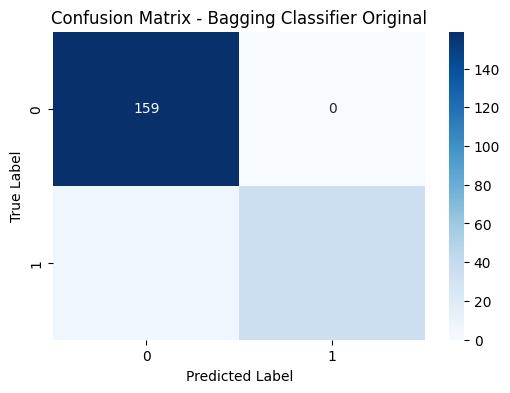

In [13]:
# Bagging Classifier dengan data original
bagging_original = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    n_estimators=100,
    random_state=RANDOM_STATE
)

bagging_original.fit(X_train_scaled, y_train)
y_pred_bagging_orig = bagging_original.predict(X_test_scaled)
y_pred_proba_bagging_orig = bagging_original.predict_proba(X_test_scaled)[:, 1]

# Evaluasi Bagging Original
accuracy_bagging_orig = accuracy_score(y_test, y_pred_bagging_orig)
precision_bagging_orig = precision_score(y_test, y_pred_bagging_orig)
recall_bagging_orig = recall_score(y_test, y_pred_bagging_orig)
f1_bagging_orig = f1_score(y_test, y_pred_bagging_orig)
auc_bagging_orig = roc_auc_score(y_test, y_pred_proba_bagging_orig)

print("=== BAGGING CLASSIFIER - DATA ORIGINAL ===")
print(f"Accuracy: {accuracy_bagging_orig:.4f}")
print(f"Precision: {precision_bagging_orig:.4f}")
print(f"Recall: {recall_bagging_orig:.4f}")
print(f"F1-Score: {f1_bagging_orig:.4f}")
print(f"AUC-ROC: {auc_bagging_orig:.4f}")

# Confusion Matrix
cm_bagging_orig = confusion_matrix(y_test, y_pred_bagging_orig)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bagging_orig, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Bagging Classifier Original')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Bagging + SMOTE

In [14]:
# Bagging Classifier dengan SMOTE
bagging_smote = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    n_estimators=100,
    random_state=RANDOM_STATE
)

bagging_smote.fit(X_train_smote, y_train_smote)
y_pred_bagging_smote = bagging_smote.predict(X_test_scaled)
y_pred_proba_bagging_smote = bagging_smote.predict_proba(X_test_scaled)[:, 1]

# Evaluasi Bagging SMOTE
accuracy_bagging_smote = accuracy_score(y_test, y_pred_bagging_smote)
precision_bagging_smote = precision_score(y_test, y_pred_bagging_smote)
recall_bagging_smote = recall_score(y_test, y_pred_bagging_smote)
f1_bagging_smote = f1_score(y_test, y_pred_bagging_smote)
auc_bagging_smote = roc_auc_score(y_test, y_pred_proba_bagging_smote)

print("\n=== BAGGING CLASSIFIER - DATA DENGAN SMOTE ===")
print(f"Accuracy: {accuracy_bagging_smote:.4f}")
print(f"Precision: {precision_bagging_smote:.4f}")
print(f"Recall: {recall_bagging_smote:.4f}")
print(f"F1-Score: {f1_bagging_smote:.4f}")
print(f"AUC-ROC: {auc_bagging_smote:.4f}")


=== BAGGING CLASSIFIER - DATA DENGAN SMOTE ===
Accuracy: 0.9200
Precision: 0.8205
Recall: 0.7805
F1-Score: 0.8000
AUC-ROC: 0.9788


## Bagging + ADASYN

In [15]:
# Bagging Classifier dengan ADASYN
bagging_adasyn = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=RANDOM_STATE),
    n_estimators=100,
    random_state=RANDOM_STATE
)

bagging_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_bagging_adasyn = bagging_adasyn.predict(X_test_scaled)
y_pred_proba_bagging_adasyn = bagging_adasyn.predict_proba(X_test_scaled)[:, 1]

# Evaluasi Bagging ADASYN
accuracy_bagging_adasyn = accuracy_score(y_test, y_pred_bagging_adasyn)
precision_bagging_adasyn = precision_score(y_test, y_pred_bagging_adasyn)
recall_bagging_adasyn = recall_score(y_test, y_pred_bagging_adasyn)
f1_bagging_adasyn = f1_score(y_test, y_pred_bagging_adasyn)
auc_bagging_adasyn = roc_auc_score(y_test, y_pred_proba_bagging_adasyn)

print("\n=== BAGGING CLASSIFIER - DATA DENGAN ADASYN ===")
print(f"Accuracy: {accuracy_bagging_adasyn:.4f}")
print(f"Precision: {precision_bagging_adasyn:.4f}")
print(f"Recall: {recall_bagging_adasyn:.4f}")
print(f"F1-Score: {f1_bagging_adasyn:.4f}")
print(f"AUC-ROC: {auc_bagging_adasyn:.4f}")


=== BAGGING CLASSIFIER - DATA DENGAN ADASYN ===
Accuracy: 0.9250
Precision: 0.7826
Recall: 0.8780
F1-Score: 0.8276
AUC-ROC: 0.9612


## 8. Perbandingan Model

=== PERBANDINGAN PERFORMA MODEL ===
                    Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
0  Random Forest Original     0.965     1.0000  0.8293    0.9067   0.9940
1   Random Forest + SMOTE     0.985     0.9750  0.9512    0.9630   0.9945
2  Random Forest + ADASYN     0.945     0.8750  0.8537    0.8642   0.9925
3        Bagging Original     0.970     1.0000  0.8537    0.9211   0.9881
4         Bagging + SMOTE     0.920     0.8205  0.7805    0.8000   0.9788
5        Bagging + ADASYN     0.925     0.7826  0.8780    0.8276   0.9612


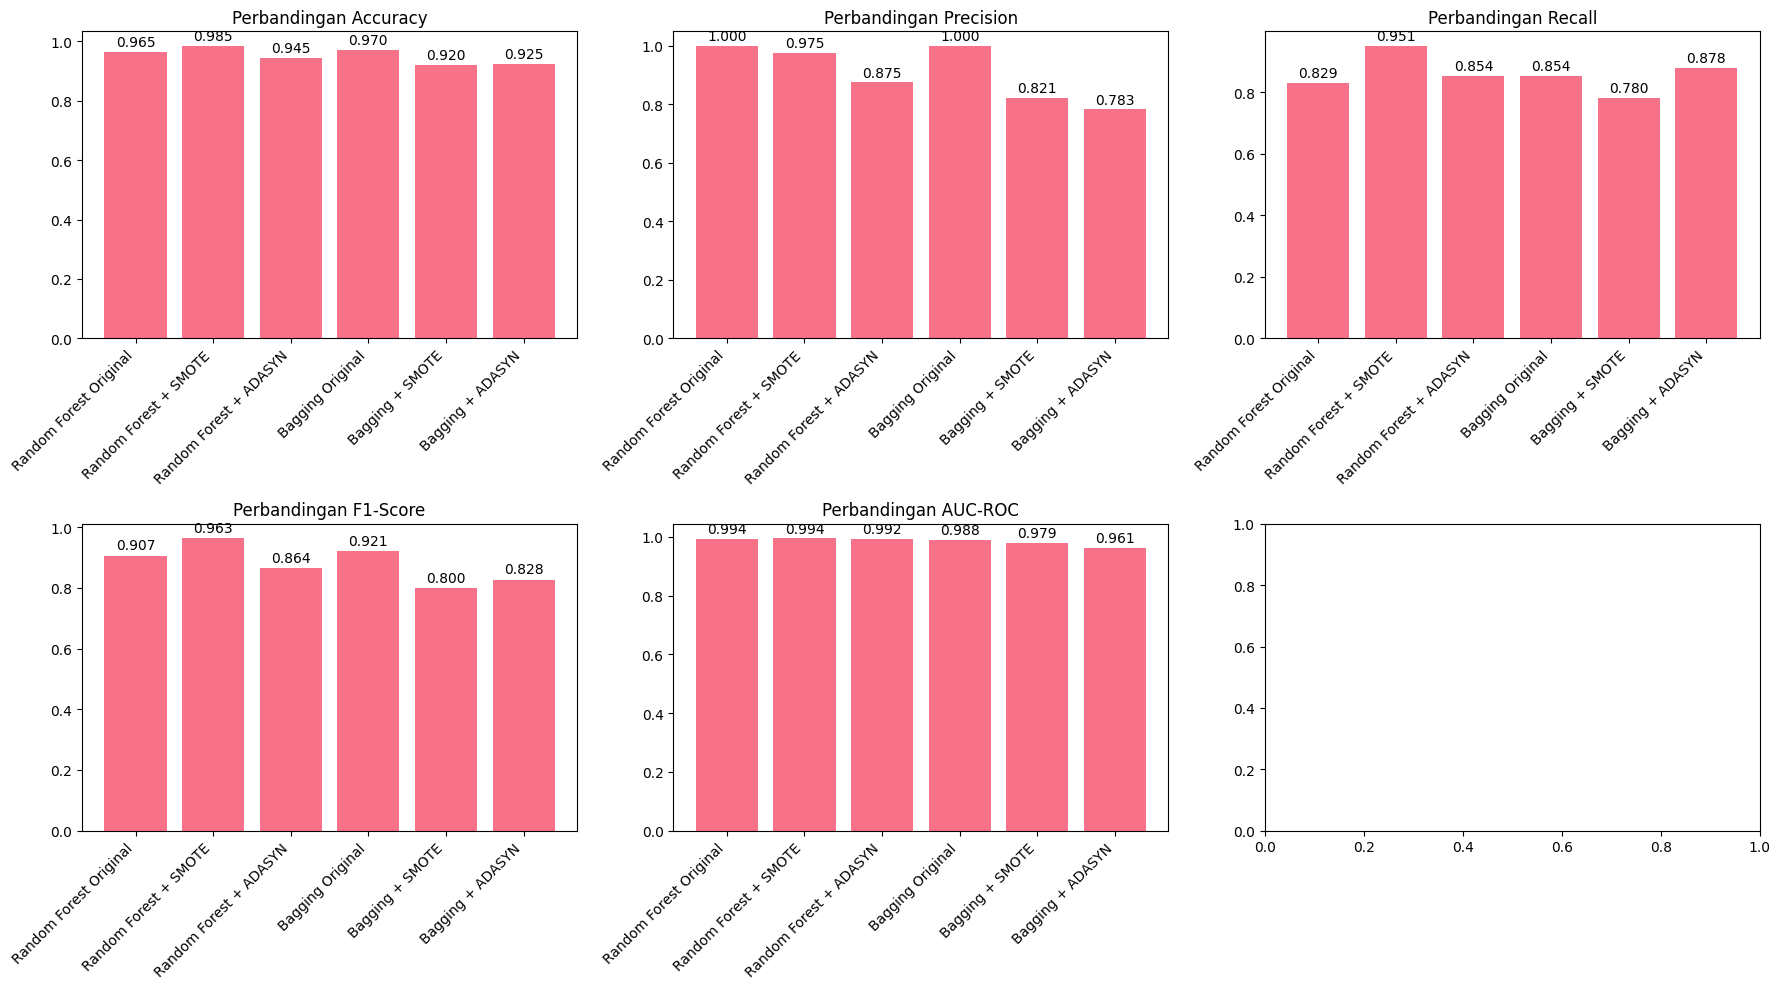

In [16]:
# Tabel perbandingan semua model
results_df = pd.DataFrame({
    'Model': [
        'Random Forest Original', 'Random Forest + SMOTE', 'Random Forest + ADASYN',
        'Bagging Original', 'Bagging + SMOTE', 'Bagging + ADASYN'
    ],
    'Accuracy': [accuracy_original, accuracy_smote, accuracy_adasyn,
                 accuracy_bagging_orig, accuracy_bagging_smote, accuracy_bagging_adasyn],
    'Precision': [precision_original, precision_smote, precision_adasyn,
                  precision_bagging_orig, precision_bagging_smote, precision_bagging_adasyn],
    'Recall': [recall_original, recall_smote, recall_adasyn,
               recall_bagging_orig, recall_bagging_smote, recall_bagging_adasyn],
    'F1-Score': [f1_original, f1_smote, f1_adasyn,
                 f1_bagging_orig, f1_bagging_smote, f1_bagging_adasyn],
    'AUC-ROC': [auc_original, auc_smote, auc_adasyn,
                auc_bagging_orig, auc_bagging_smote, auc_bagging_adasyn]
})

print("=== PERBANDINGAN PERFORMA MODEL ===")
print(results_df.round(4))

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    
    bars = axes[row, col].bar(range(len(results_df)), results_df[metric])
    axes[row, col].set_title(f'Perbandingan {metric}')
    axes[row, col].set_xticks(range(len(results_df)))
    axes[row, col].set_xticklabels(results_df['Model'], rotation=45, ha='right')
    
    for j, bar in enumerate(bars):
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 9. Kesimpulan

In [17]:
# Analisis hasil dan rekomendasi
best_model_idx = results_df['AUC-ROC'].idxmax()
best_model = results_df.loc[best_model_idx]

print("=== KESIMPULAN ===")
print(f"\n1. Model Terbaik: {best_model['Model']}")
print(f"   - AUC-ROC: {best_model['AUC-ROC']:.4f}")
print(f"   - Accuracy: {best_model['Accuracy']:.4f}")

print("\n2. Analisis Teknik Balancing:")
print(f"   - SMOTE meningkatkan AUC: {((auc_smote - auc_original)/auc_original)*100:+.2f}%")
print(f"   - ADASYN meningkatkan AUC: {((auc_adasyn - auc_original)/auc_original)*100:+.2f}%")

print("\n3. Random Forest vs Bagging:")
rf_best = max(auc_original, auc_smote, auc_adasyn)
bagging_best = max(auc_bagging_orig, auc_bagging_smote, auc_bagging_adasyn)
if bagging_best > rf_best:
    print(f"   → Bagging lebih unggul (+{((bagging_best-rf_best)/rf_best)*100:.2f}%)")
else:
    print(f"   → Random Forest lebih unggul (+{((rf_best-bagging_best)/bagging_best)*100:.2f}%)")

print("\n4. Rekomendasi:")
print(f"   - Gunakan {best_model['Model']} untuk hasil terbaik")
print(f"   - Teknik balancing data terbukti efektif untuk dataset tidak seimbang")
print(f"   - Ensemble methods (Random Forest & Bagging) memberikan performa yang robust")

=== KESIMPULAN ===

1. Model Terbaik: Random Forest + SMOTE
   - AUC-ROC: 0.9945
   - Accuracy: 0.9850

2. Analisis Teknik Balancing:
   - SMOTE meningkatkan AUC: +0.05%
   - ADASYN meningkatkan AUC: -0.15%

3. Random Forest vs Bagging:
   → Random Forest lebih unggul (+0.64%)

4. Rekomendasi:
   - Gunakan Random Forest + SMOTE untuk hasil terbaik
   - Teknik balancing data terbukti efektif untuk dataset tidak seimbang
   - Ensemble methods (Random Forest & Bagging) memberikan performa yang robust
